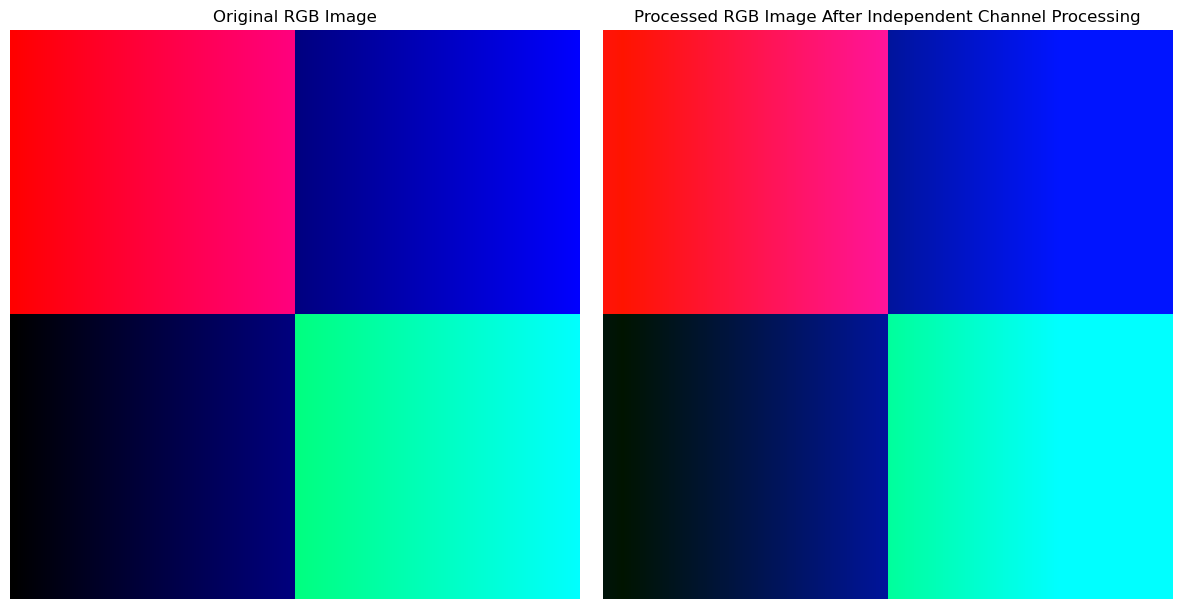

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ===========================================================
# Concept of Per-Component Processing
# ===========================================================
# In this approach, each color channel (Red, Green, and Blue) is treated as a separate grayscale image. 
# Processing is applied independently to each channel, and the results are then combined to form the final RGB image.
#
# The steps performed in this approach are:
# 1. Load grayscale images representing the Red (R), Green (G), and Blue (B) components of the image.
# 2. Apply independent processing to each of these components (e.g., enhancing contrast, applying filters).
# 3. Merge the processed R, G, and B components to form a final RGB image.
# ===========================================================

# ===========================================================
# Step 1: Define the directory and load images
# ===========================================================
# Define the data directory where the image components (red_band.jpg, green_band.jpg, blue_band.jpg) are stored.
data_dir = os.path.join(os.getcwd(), 'data', 'images')

# Load the individual color channels (Red, Green, Blue) as grayscale images
R = cv2.imread(os.path.join(data_dir, 'red_band.jpg'), cv2.IMREAD_GRAYSCALE)  # Red channel as grayscale
G = cv2.imread(os.path.join(data_dir, 'green_band.jpg'), cv2.IMREAD_GRAYSCALE)  # Green channel as grayscale
B = cv2.imread(os.path.join(data_dir, 'blue_band.jpg'), cv2.IMREAD_GRAYSCALE)  # Blue channel as grayscale

# ===========================================================
# Step 2: Check if images are loaded correctly
# ===========================================================
# If any of the channels is not loaded properly, raise an error and inform the user.
if R is None or G is None or B is None:
    raise FileNotFoundError(f"Ensure all R, G, and B band images are available in {data_dir}.")

# ===========================================================
# Step 3: Independent Processing on Each Channel
# ===========================================================
# We can apply different kinds of processing to each channel.
# For this example, we apply contrast enhancement using `cv2.convertScaleAbs()`, which scales and shifts pixel values.

# Enhance the Red channel by increasing its contrast (alpha = 1.5) and leaving brightness unchanged (beta = 0)
R_processed = cv2.convertScaleAbs(R, alpha=1.5, beta=0)  

# Enhance the Green channel by increasing its contrast slightly (alpha = 1.2) and adding some brightness (beta = 20)
G_processed = cv2.convertScaleAbs(G, alpha=1.2, beta=20)  

# Enhance the Blue channel by increasing contrast (alpha = 1.3) and slightly decreasing its brightness (beta = -10)
B_processed = cv2.convertScaleAbs(B, alpha=1.3, beta=-10)  

# ===========================================================
# Step 4: Combine the Processed Channels into Final RGB Image
# ===========================================================
# After processing each color channel independently, merge them back into a single RGB image.
# Note: OpenCV uses BGR format, so the order should be [Blue, Green, Red].

# Merge the processed channels to create the final RGB image
rgb_image_processed = cv2.merge([B_processed, G_processed, R_processed])

# ===========================================================
# Step 5: Visualization
# ===========================================================
# Create a figure for displaying both the original and processed images side by side.
plt.figure(figsize=(12, 6))

# Display the original RGB image (before processing)
plt.subplot(1, 2, 1)  
# Re-merge the original channels (B, G, R) for visualization
original_rgb_image = cv2.merge([B, G, R])  
# Convert the image from BGR to RGB for proper visualization in matplotlib
plt.imshow(cv2.cvtColor(original_rgb_image, cv2.COLOR_BGR2RGB))
# Set the title of the first subplot
plt.title("Original RGB Image")
# Hide the axis for better visualization
plt.axis('off')

# Display the processed RGB image (after independent channel processing)
plt.subplot(1, 2, 2)  
# Convert the processed image from BGR to RGB for proper visualization in matplotlib
plt.imshow(cv2.cvtColor(rgb_image_processed, cv2.COLOR_BGR2RGB))
# Set the title of the second subplot
plt.title("Processed RGB Image After Independent Channel Processing")
# Hide the axis for better visualization
plt.axis('off')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
# Display the images
plt.show()